In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 500
M = 500
h = 1 / max(N, M)
Grid = np.zeros((N, M))
Grid[0] = np.zeros(M)
Grid[N-1] = np.zeros(M)
Grid[:, 0] = np.zeros(N)
Grid[:, M-1] = np.zeros(N)

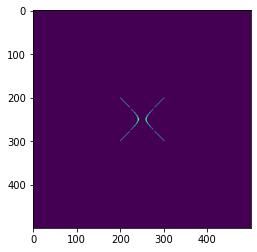

In [3]:
def f(x, y):
    A = (x - 0.5) ** 2 - (y - 0.5) ** 2 < 0.02**2 
    B = (x - 0.5) ** 2 - (y - 0.5) ** 2 > 0.015**2
    return 50 *  np.array(A*B)

def f2(x, y):
    return np.exp(x + y)

eps = 1e-6
p = 1e10
X, Y = np.meshgrid(np.linspace(0, 1, 500, endpoint=False), np.linspace(0, 1, 500, endpoint=False))
plt.imshow((f(X, Y)))

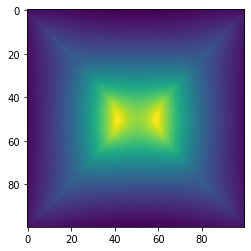

In [4]:
#метод средних арифметических
while p > eps:
    p = np.max(np.abs(Grid[1:N-1, 1:M-1] - (Grid[2:N, 1:M-1] + Grid[0:N-2, 1:M-1] + Grid[1:N-1, 2:M] + Grid[1:N-1, 0:M-2])/4 - f(X[1:N-1, 1:M-1], Y[1:N-1, 1:M-1])*h**2 / 4 ))
    Grid[1:N-1, 1:M-1] = (Grid[2:N, 1:M-1] + Grid[0:N-2, 1:M-1] + Grid[1:N-1, 2:M] + Grid[1:N-1, 0:M-2])/4 + f(X[1:N-1, 1:M-1], Y[1:N-1, 1:M-1])*h**2 / 4
plt.imshow(Grid[200:300, 200:300])